In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
import malaya_speech
import tensorflow as tf

In [4]:
featurizer = malaya_speech.tf_featurization.STTFeaturizer()

In [5]:
x, sr = malaya_speech.load('../speech/example-speaker/husein-zolkepli.wav')
len(x), sr

(90090, 16000)

In [6]:
i = tf.placeholder(tf.float32, [None])
y = featurizer(i)
y_frequency = malaya_speech.augmentation.spectrogram.tf_mask_frequency(y)
y_time = malaya_speech.augmentation.spectrogram.tf_mask_time(y_frequency)


Instructions for updating:
Use `tf.cast` instead.


In [7]:
sess = tf.InteractiveSession()

In [8]:
y_, y_frequency_, y_time_ = sess.run([y, y_frequency, y_time], feed_dict = {i: x})

In [9]:
y_.shape

(561, 80)

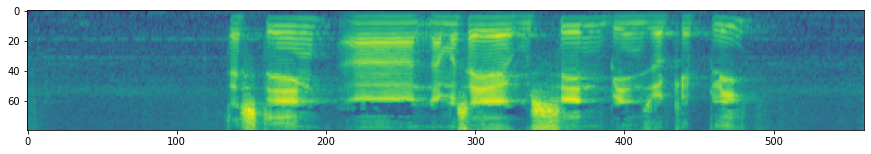

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.imshow(y_.T)

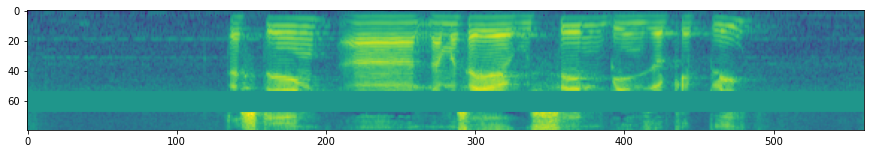

In [11]:
plt.figure(figsize = (15, 5))
plt.imshow(y_frequency_.T)

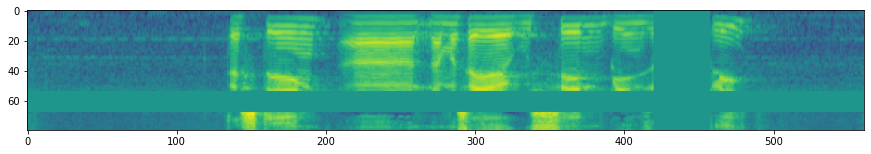

In [12]:
plt.figure(figsize = (15, 5))
plt.imshow(y_time_.T)